In [9]:
datadir = '/data/special/web_viewer_verify/tiles'
csvdir = '/data/special/web_viewer_verify/centroids'
gtdir = '/data/special/web_viewer_verify/annotated/'

In [2]:
import glob
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os

In [10]:
os.makedirs(csvdir,exist_ok=True)

In [3]:
tilelist = [os.path.basename(x) for x in glob.glob(datadir+'/*_*.png')]

In [4]:
imglist = []
for ti in tilelist:
    imname = ti.split('_')[0]
    if imname not in imglist:
        imglist.append(imname)

In [17]:
from skimage.measure import regionprops, label

sl = [
    (slice(0,256),slice(0,256)),
    (slice(256,512),slice(0,256)),
    (slice(0,256),slice(256,512)),
    (slice(256,512),slice(256,512))
]

def get_gt(tilename):
    imname, rest  = tilename.split('_')
    part = int(rest.split('.')[0])
    print(imname,part)
    gt_4 = np.array(Image.open(gtdir+'/'+imname+'.png'))
    sub = gt_4[sl[part]]
    props = regionprops(label(sub[...,0]>0))
    pts = [x.centroid for x in props] # r,c
    return np.array(pts)*2, imname+'_'+str(part)
    

In [6]:
ntiles = len(tilelist)

In [7]:
ntiles

148

In [20]:
imname

'10106_0'

In [24]:
pts[0].tolist()

[5.0, 165.0]

10106 0


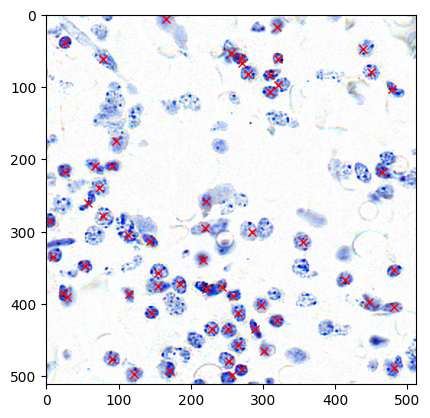

In [30]:

for ii in range(ntiles):
    pts,imname = get_gt(tilelist[ii])
    with open(f'{csvdir}/{imname}.csv','wt') as csvf:
        for pt in pts:
            csvf.write('%d,%d\n'% tuple(pt.tolist()))
    
    if not False:
        plt.figure()
        im = Image.open(datadir+'/'+tilelist[ii])
        plt.imshow(im)

        plt.plot(pts[:,1],pts[:,0],'rx')
        break
#         if (ii+1)%20==0:
#             plt.show()
#             break
        